# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

План:

Загрузите и подготовьте данные. Поясните порядок действий.

Исследуйте баланс классов, обучите модель без учёта дисбаланса. Кратко опишите выводы.

Улучшите качество модели, учитывая дисбаланс классов. Обучите разные модели и найдите лучшую. Кратко опишите выводы.

Проведите финальное тестирование.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier


import warnings
warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv('/datasets/Churn.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
data.duplicated().sum()

0

Столбец 'Tenure' имеет пропуски. Следует заменить пропуски на минимальное значение, их менее 10%.

In [7]:
data['Tenure'] = data['Tenure'].fillna(5)

In [8]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Признаки: 

RowNumber — индекс строки в данных, не имеет ценности для обучения модели, можно столбец удалить. 

CustomerId — уникальный идентификатор клиента, стоблец можно удалить.

Surname — фамилия, не несет ценности для качества будущей модели — столбец можно удалить.

CreditScore — кредитный рейтинг, следует проверить распределение и сохранить данный столбец.

Geography — страна проживания, имеет 3 уникальных значения France', 'Spain', 'Germany' — выполнить преобразование OHE.

Gender — пол, значение преобразовать — OHE.

Age — возраст, 

Tenure — сколько лет человек является клиентом банка, 

Balance — баланс на счёте, 

NumOfProducts — количество продуктов банка, используемых клиентом, 

HasCrCard — наличие кредитной карты, 

IsActiveMember — активность клиента, 

EstimatedSalary — предполагаемая зарплата.

Целевой признак: 'Exited' — факт ухода клиента.

In [9]:
#Обозначим новый датафрейм "data_ml" — данные для машинного обучения
#Удалим столбцы-идентификаторы, не представляющие ценностия для алгоритма 
for_drop = ['RowNumber','CustomerId', 'Surname']
data_ml = data.drop(for_drop, axis=1)
data_ml.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


## Исследование задачи

In [10]:
# Данные подготовлены методом OHE, позволит использовать разные модели и не словить дамми-ловушку
data_ml = pd.get_dummies(data_ml, drop_first=True)
data_ml.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [11]:
data_ml.shape

(10000, 12)

В новом датафрейме количество столбцов увеличелост на 1. Столбец 'Geography' содержал 3 класса, 'Gender_Male' 2 класса. В итоге получилось только 2 и 1 столбцов соответственно, что позволяет избежать дамми-ловушку.

In [12]:
#Разделим на признаки и целевой признак
features = data_ml.drop('Exited', axis=1)
target = data_ml['Exited']

In [13]:
#Валидационная 60%
features_train, features_validtest, target_train, target_validtest = train_test_split(features,
                                                    target,
                                                    train_size=0.6,
                                                    random_state=12345)

In [14]:
#Валидационная и тестовая по 20% от общей
features_valid, features_test, target_valid, target_test = train_test_split(features_validtest,
                                                    target_validtest,
                                                    train_size=0.5,
                                                    random_state=12345)

Созданы выборки: обучающая - 60, валидационная - 20 и тестовая - 20.

In [15]:
#Для масштабирования методом scaler зафиксируем численные признаки
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [16]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])

StandardScaler()

In [17]:
#Масштабируем численные признаки обучающей выборки
features_train[numeric] = scaler.transform(features_train[numeric])
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,-0.886751,-0.373192,1.082277,1.232271,-0.891560,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,1.082277,0.600563,-0.891560,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,-0.737696,1.027098,0.830152,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,0.354288,-1.233163,0.830152,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,-1.101690,1.140475,-0.891560,0,0,1.524268,1,0,0


In [18]:
#Масштабируем численные признаки валидационной выборки 
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_valid.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8532,-0.699824,-0.373192,-1.101690,-1.233163,0.830152,1,0,-0.015173,0,0,0
5799,-0.284431,0.575842,-0.737696,-1.233163,-0.891560,1,1,1.471724,0,0,0
5511,0.151731,-0.657902,-1.829679,0.438711,-0.891560,1,0,-1.367107,1,0,1
7365,-0.876366,-0.278288,1.810266,1.239884,-0.891560,1,1,-0.786517,0,1,0
7367,-0.481743,0.291132,1.810266,-1.233163,0.830152,1,0,1.358533,0,1,1


In [19]:
#Масштабируем численные признаки тестовой выборки 
features_test[numeric] = scaler.transform(features_test[numeric])
features_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7041,-2.226392,-0.088482,-1.101690,-1.233163,0.830152,1,0,0.647083,0,0,1
5709,-0.087120,0.006422,1.446272,-1.233163,-0.891560,1,0,-1.658410,0,0,0
7117,-0.917905,-0.752805,-0.009707,0.722307,-0.891560,1,1,-1.369334,0,1,1
7775,-0.253277,0.101325,1.810266,-1.233163,0.830152,1,0,0.075086,0,1,1
8735,0.785204,-0.847708,1.810266,0.615625,-0.891560,0,1,-1.070919,0,0,1


В результате мы получили масштабированные признаки для трех выборок. Перейдем к обучению моделей.

In [20]:
def all_models_accuracy(features_train, target_train, features_valid, target_valid):
    model_DTC = DecisionTreeClassifier(random_state=1515)
    DTC_score = model_DTC.fit(features_train, target_train).score(features_valid, target_valid)
    
    model_RFC = RandomForestClassifier(max_depth=7, n_estimators=43, min_samples_leaf=3, random_state=1515)
    RFC_score = model_RFC.fit(features_train, target_train).score(features_valid, target_valid)
    
    model_LgR = LogisticRegression(solver = 'liblinear')
    LgR_score = model_LgR.fit(features_train, target_train).score(features_valid, target_valid)
    print("Точность:" "дерево решений", DTC_score, "случайный лес ", RFC_score, "логистческая регрессия", LgR_score)

In [21]:
all_models_accuracy(features_train, target_train, features_valid, target_valid)

Точность:дерево решений 0.79 случайный лес  0.8585 логистческая регрессия 0.802


Исследование баланса классов выборки.

In [22]:
target_train.value_counts(normalize = 1)

0    0.800667
1    0.199333
Name: Exited, dtype: float64

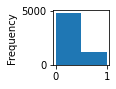

In [23]:
# Диаграмма баланса классов
target_train.plot(kind ='hist', bins=2, figsize=(1,1));

В имеющейся выборке отрицательных ответов около 80% , положитительных около 20%. Имеется дисбаланс.

Проверим качество моделей до борьбы с дисбалансом

In [24]:
#Заранее напишем функцию для изучия полноты, точности и F1-меры
def rec_prec_f1(target_valid, prediction):
    print("Полнота" , recall_score(target_valid, prediction))
    print("Точность", precision_score(target_valid, prediction))
    print("F1-мера", f1_score(target_valid, prediction))

In [25]:
# Функция для отображения соотношения ответов моделей (сколько 0, сколько 1)
def all_models_share(features_train, target_train, features_valid, target_valid):
    model_DTC = DecisionTreeClassifier(random_state=1515)
    model_DTC.fit(features_train, target_train)
    DTC_share = pd.Series(model_DTC.predict(features_valid)).value_counts(normalize = 1)
    
    
    
    model_RFC = RandomForestClassifier(random_state=1515, n_estimators = 100)
    model_RFC.fit(features_train, target_train)
    RFC_share = pd.Series(model_RFC.predict(features_valid)).value_counts(normalize = 1)
    
    model_LgR = LogisticRegression(solver = 'liblinear')
    model_LgR.fit(features_train, target_train)
    LgR_share = pd.Series(model_LgR.predict(features_valid)).value_counts(normalize = 1)
    

    
    print("Доли ответов:" "Дерево решений", DTC_share, "Случайный лес ", RFC_share, "Логистческая регрессия", LgR_share , end='')

In [26]:
#Применим функцию отображения соотношения ответов моделей
all_models_share(features_train, target_train, features_valid, target_valid)

Доли ответов:Дерево решений 0    0.795
1    0.205
dtype: float64 Случайный лес  0    0.874
1    0.126
dtype: float64 Логистческая регрессия 0    0.913
1    0.087
dtype: float64

Логистичесая регрессия выдает самую высокую точность, затем Случайный лес и после Дерево решений.

С учетом дисбаланса результата модели с большой вероятностью будут выдавать ответ 0, построим матрицы ошибок для моделей.

In [27]:
# Случайный лес
model_RFC = RandomForestClassifier(random_state=1515, n_estimators = 100)
model_RFC.fit(features_train, target_train)
RFC_prediction = model_RFC.predict(features_valid)
confusion_matrix(target_valid, RFC_prediction)

array([[1526,   56],
       [ 222,  196]])

In [28]:
rec_prec_f1(target_valid, RFC_prediction)

Полнота 0.4688995215311005
Точность 0.7777777777777778
F1-мера 0.5850746268656717


In [29]:
#Расчет roc_auc_RFC
RFC_probabilities_one_valid = model_RFC.predict_proba(features_valid)[:, 1]

auc_roc_RFC = roc_auc_score(target_valid, RFC_probabilities_one_valid)

auc_roc_RFC

0.8383821581306443

In [30]:
# Циклом ищем лучший гиперпораметр max_depth

for depth in range(1,10,1):
    model_tree=DecisionTreeClassifier(max_depth=depth,random_state=1234).fit(features_train, target_train)
    prediction=model_tree.predict(features_valid)
    print('max_depth:',depth,'F1:',f1_score(target_valid,prediction))

max_depth: 1 F1: 0.0
max_depth: 2 F1: 0.5217391304347825
max_depth: 3 F1: 0.4234875444839857
max_depth: 4 F1: 0.5528700906344411
max_depth: 5 F1: 0.5406249999999999
max_depth: 6 F1: 0.56752655538695
max_depth: 7 F1: 0.5485362095531587
max_depth: 8 F1: 0.5418569254185692
max_depth: 9 F1: 0.5577464788732395


Лучшее значение max_depth=6, при котором F1=0.567

In [31]:
# Циклом ищем лучший гиперпораметр max_depth

for max_depth in range(1,20,1):
    model_forest=RandomForestClassifier(max_depth=max_depth,n_estimators=50,random_state=1234).fit(features_train, target_train)
    prediction=model_forest.predict(features_valid)
    print('max_depth:',max_depth,'F1:',f1_score(target_valid,prediction))

max_depth: 1 F1: 0.0
max_depth: 2 F1: 0.20085470085470084
max_depth: 3 F1: 0.23651452282157678
max_depth: 4 F1: 0.35984848484848486
max_depth: 5 F1: 0.4786324786324787
max_depth: 6 F1: 0.5271828665568369
max_depth: 7 F1: 0.540453074433657
max_depth: 8 F1: 0.5641838351822503
max_depth: 9 F1: 0.5696202531645569
max_depth: 10 F1: 0.5727848101265823
max_depth: 11 F1: 0.5696969696969697
max_depth: 12 F1: 0.5652173913043478
max_depth: 13 F1: 0.5649546827794562
max_depth: 14 F1: 0.5714285714285714
max_depth: 15 F1: 0.5907046476761619
max_depth: 16 F1: 0.5824665676077266
max_depth: 17 F1: 0.5761194029850746
max_depth: 18 F1: 0.5803571428571428
max_depth: 19 F1: 0.5709969788519637


Лучшее значение max_depth=19, при котором F1=0.594

In [32]:
# Циклом подбираем гиперпораметр n_estimators (количество деревьев)
for estim in range(1,50,2):
    model_forest=RandomForestClassifier(max_depth=19,n_estimators=estim,random_state=1234).fit(features_train, target_train)
    prediction=model_forest.predict(features_valid)
    print('estim',estim,'F1:',f1_score(target_valid,prediction))

estim 1 F1: 0.49821215733015495
estim 3 F1: 0.5424657534246575
estim 5 F1: 0.5348189415041783
estim 7 F1: 0.5542857142857143
estim 9 F1: 0.5714285714285714
estim 11 F1: 0.5710186513629841
estim 13 F1: 0.5701881331403763
estim 15 F1: 0.5735080058224163
estim 17 F1: 0.5714285714285714
estim 19 F1: 0.5726872246696035
estim 21 F1: 0.5714285714285715
estim 23 F1: 0.5739644970414202
estim 25 F1: 0.5773195876288659
estim 27 F1: 0.5828402366863905
estim 29 F1: 0.5828402366863905
estim 31 F1: 0.5765230312035662
estim 33 F1: 0.5748148148148149
estim 35 F1: 0.5735512630014858
estim 37 F1: 0.56973293768546
estim 39 F1: 0.5710059171597633
estim 41 F1: 0.5680473372781065
estim 43 F1: 0.5701624815361891
estim 45 F1: 0.5663189269746647
estim 47 F1: 0.5646359583952452
estim 49 F1: 0.5637181409295353


Лучшее значение max_depth=19 и n_estimators=19 при котором F1=0.588

In [33]:
model_logistic=LogisticRegression().fit(features_train, target_train)
prediction=model_logistic.predict(features_valid)
print('F1:',f1_score(target_valid,prediction))

F1: 0.33108108108108103


F1 = 0.331

Случайный лес имеет примерно равную пропорцию позитивных и негативных предсказаний, выдает заметно больше качественных предсказаний, но также сильно склоняется к ложно позитивным предсказаниям (FP). Точность и качество также низкое.

In [34]:
#Матрица ошибок для дерево решений
model_DTC = DecisionTreeClassifier(random_state=1515)
model_DTC.fit(features_train, target_train)
DTC_prediction = model_DTC.predict(features_valid)
confusion_matrix(target_valid, DTC_prediction)

array([[1376,  206],
       [ 214,  204]])

Матрица показала, что Дерево решений склонно выдавать позитивные предсказания, очень высокое количество ложных позитивных предсказания (FP).

In [35]:
rec_prec_f1(target_valid, DTC_prediction)

Полнота 0.4880382775119617
Точность 0.4975609756097561
F1-мера 0.49275362318840576


In [36]:
#Расчет roc_auc_DTC
DTC_probabilities_one_valid = model_DTC.predict_proba(features_valid)[:, 1]

auc_roc_DTC = roc_auc_score(target_valid, DTC_probabilities_one_valid)

auc_roc_DTC

0.6789116798432122

Низкое значение F1, следовательно низкое качество модели, проблема в точности.

In [37]:
#Матрица ошибок для логистической регрессии
model_LgR = LogisticRegression(solver = 'liblinear')
model_LgR.fit(features_train, target_train)
LgR_prediction = model_LgR.predict(features_valid)
confusion_matrix(target_valid, LgR_prediction)

array([[1506,   76],
       [ 320,   98]])

In [38]:
rec_prec_f1(target_valid, LgR_prediction)

Полнота 0.23444976076555024
Точность 0.5632183908045977
F1-мера 0.33108108108108103


In [39]:
#Для логистической регрессии расчитаем метрику AUC-ROC
LgR_probabilities_one_valid = model_LgR.predict_proba(features_valid)[:, 1]

auc_roc_LgR = roc_auc_score(target_valid, LgR_probabilities_one_valid)

auc_roc_LgR

0.7587512627102753

In [40]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.legend()
    plt.show()

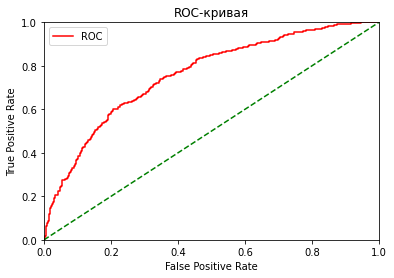

In [41]:
fper, tper, thresholds = roc_curve(target_valid, LgR_probabilities_one_valid)
plot_roc_curve(fper, tper)

Score 0.802
AUC-ROC 0.7587512627102753


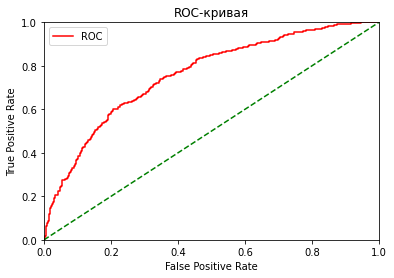

In [42]:
#Попробуем обучать логистическую регресию, сбалансировав классы
model_LgR = LogisticRegression(solver = 'liblinear')
model_LgR.fit(features_train, target_train)
LgR_probabilities_one_valid_class_weight = model_LgR.predict_proba(features_valid)[:, 1]
print("Score", model_LgR.score(features_valid, target_valid))
print("AUC-ROC", roc_auc_score(target_valid, LgR_probabilities_one_valid_class_weight))

fper, tper, thresholds = roc_curve(target_valid, LgR_probabilities_one_valid_class_weight) 
plot_roc_curve(fper, tper)

Наблюдается отстутсвие улучшений. Высокая точность модели объясняется высокой долей негативных ответов в валидационной выборке.

## Борьба с дисбалансом

In [43]:
#Создадим функцию для увеличения представленной класса в выборке 
def upsample(features, target, repeat, upsampled_сlass):
 
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    if upsampled_сlass == 0:
        features_upsampled = pd.concat([features_zeros]* repeat + [features_ones] )
        target_upsampled = pd.concat([target_zeros]* repeat + [target_ones] )
        features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
        
    elif upsampled_сlass == 1:
        features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
        target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
        features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    else:
        features_upsampled = 0
        target_upsampled = 0  
        
        
       
    return features_upsampled, target_upsampled

In [45]:
features_downsampled_train, target_downsampled_train = downsample(features_train, target_train, fraction=0.25)

In [46]:
#Протестируем функцию (верное значение)
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4, 0)
print(target_train_upsampled.value_counts(normalize = 1))
print(target_train_upsampled.shape)

0    0.941407
1    0.058593
Name: Exited, dtype: float64
(20412,)


In [47]:
#Протестируем функцию (верное значение)
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4, 3)
features_train_upsampled

0

In [48]:
#Применим функцию upsample 
#увеличим количество положительных ответов в 4 раза
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4, 1)
print(target_train_upsampled.value_counts(normalize = 1))
print(target_train_upsampled.shape)

0    0.501043
1    0.498957
Name: Exited, dtype: float64
(9588,)


In [49]:
#Применим функцию downsample
#Уменьшим количество пооложительных ответов в 4 раза
#Протестируем функцию (верное значение)
features_downsampled_train, target_downsampled_train = downsample(features_train, target_train, 0.2)
print(target_downsampled_train.value_counts(normalize = 0))
print(target_downsampled_train.shape)

1    1196
0     961
Name: Exited, dtype: int64
(2157,)


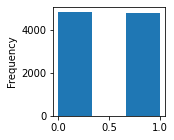

In [50]:
target_train_upsampled.plot(kind ='hist', bins=3, figsize=(2,2));

In [51]:
#Точность моделей на выборке с дисбалансом
all_models_accuracy(features_train, target_train, features_valid, target_valid)

Точность:дерево решений 0.79 случайный лес  0.8585 логистческая регрессия 0.802


In [52]:
#Точность моделей на сбалансированной выборке
all_models_accuracy(features_train_upsampled, target_train_upsampled, features_valid, target_valid)

Точность:дерево решений 0.793 случайный лес  0.8105 логистческая регрессия 0.702


Точность сильно не изменилась. Проверим качество ответов.

In [53]:
#Решающее дерево
model_DTC_upsampled = DecisionTreeClassifier(random_state=1515)
model_DTC_upsampled.fit(features_train_upsampled, target_train_upsampled)
DTC_prediction_upsampled = model_DTC_upsampled.predict(features_valid)
rec_prec_f1(target_valid, DTC_prediction_upsampled)

Полнота 0.4784688995215311
Точность 0.5050505050505051
F1-мера 0.49140049140049147


In [54]:
#Расчитаем auc_roc для DTC на сбалансированной выборке
DTC_upsampled_valid = model_DTC_upsampled.predict_proba(features_valid)[:, 1]

auc_roc_DTC = roc_auc_score(target_valid, DTC_upsampled_valid)

auc_roc_DTC

0.6772875471058983

In [55]:
for depth in range(1,10,1):
    model_DTC_upsampled=DecisionTreeClassifier(max_depth=depth,random_state=12345).fit(features_train_upsampled, target_train_upsampled)
    prediction=model_DTC_upsampled.predict(features_valid)
    print('max_depth:',depth,'F1:',f1_score(target_valid,prediction))

max_depth: 1 F1: 0.4994903160040775
max_depth: 2 F1: 0.541015625
max_depth: 3 F1: 0.541015625
max_depth: 4 F1: 0.5277777777777778
max_depth: 5 F1: 0.5963791267305644
max_depth: 6 F1: 0.5581835383159887
max_depth: 7 F1: 0.5524752475247525
max_depth: 8 F1: 0.5408560311284047
max_depth: 9 F1: 0.5405940594059405


Лучшее значение max_depth=5, при котором F1=0.596

In [56]:
# Циклом ищем лучший гиперпораметр max_depth

for max_depth in range(1,20,1):
    model_forest=RandomForestClassifier(max_depth=max_depth,n_estimators=50,random_state=12345).fit(features_train_upsampled, target_train_upsampled)
    prediction=model_forest.predict(features_valid)
    print('max_depth:',max_depth,'F1:',f1_score(target_valid,prediction))

max_depth: 1 F1: 0.546458141674333
max_depth: 2 F1: 0.5564892623716153
max_depth: 3 F1: 0.5746061167747915
max_depth: 4 F1: 0.6011673151750972
max_depth: 5 F1: 0.6068965517241379
max_depth: 6 F1: 0.6068965517241379
max_depth: 7 F1: 0.6122860020140987
max_depth: 8 F1: 0.621196222455404
max_depth: 9 F1: 0.6214209968186638
max_depth: 10 F1: 0.6179039301310043
max_depth: 11 F1: 0.6192090395480226
max_depth: 12 F1: 0.6083916083916083
max_depth: 13 F1: 0.6107055961070559
max_depth: 14 F1: 0.6110429447852761
max_depth: 15 F1: 0.6047678795483061
max_depth: 16 F1: 0.6104725415070242
max_depth: 17 F1: 0.6057441253263707
max_depth: 18 F1: 0.6038709677419355
max_depth: 19 F1: 0.6103896103896105


Лучшее значение max_depth=9, при котором F1=0.621

In [57]:
# Циклом подбираем гиперпораметр n_estimators (количество деревьев)
for estim in range(1,50,2):
    model_forest=RandomForestClassifier(max_depth=9,n_estimators=estim,random_state=12345).fit(features_train_upsampled, target_train_upsampled)
    prediction=model_forest.predict(features_valid)
    print('estim',estim,'F1:',f1_score(target_valid,prediction))

estim 1 F1: 0.5365402405180388
estim 3 F1: 0.568273092369478
estim 5 F1: 0.5811088295687886
estim 7 F1: 0.6029411764705882
estim 9 F1: 0.6010471204188481
estim 11 F1: 0.6027111574556829
estim 13 F1: 0.6023329798515378
estim 15 F1: 0.6044538706256628
estim 17 F1: 0.6044538706256628
estim 19 F1: 0.5967914438502674
estim 21 F1: 0.6042553191489363
estim 23 F1: 0.6112886048988285
estim 25 F1: 0.6143931256713211
estim 27 F1: 0.617363344051447
estim 29 F1: 0.6134185303514378
estim 31 F1: 0.6198083067092651
estim 33 F1: 0.617678381256656
estim 35 F1: 0.618490967056323
estim 37 F1: 0.6191489361702128
estim 39 F1: 0.6203208556149732
estim 41 F1: 0.6155484558040468
estim 43 F1: 0.6247334754797441
estim 45 F1: 0.6212765957446809
estim 47 F1: 0.6183368869936033
estim 49 F1: 0.6219382321618744


Лучшее значение max_depth=7 и n_estimators=43 при котором F1=0.625

In [58]:
#Случайный лес
model_RFC_upsampled = RandomForestClassifier(max_depth=7, n_estimators=43, min_samples_leaf=3, random_state=1515)
model_RFC_upsampled.fit(features_train_upsampled, target_train_upsampled)
RFC_prediction_upsampled = model_RFC_upsampled.predict(features_valid)
rec_prec_f1(target_valid, RFC_prediction_upsampled)

Полнота 0.7200956937799043
Точность 0.5346358792184724
F1-мера 0.6136595310907238


In [59]:
#Расчитаем auc_roc для RFC на сбалансированной выборке
RFC_upsampled_valid = model_RFC_upsampled.predict_proba(features_valid)[:, 1]

auc_roc_RFC = roc_auc_score(target_valid, RFC_upsampled_valid)

auc_roc_RFC

0.8507499138030111

In [60]:
#Логистическая регрессия
model_LgR_upsampled = LogisticRegression(solver = 'liblinear')
model_LgR_upsampled.fit(features_train_upsampled, target_train_upsampled)
LgR_prediction_upsampled = model_LgR_upsampled.predict(features_valid)
rec_prec_f1(target_valid, LgR_prediction_upsampled)

Полнота 0.6818181818181818
Точность 0.3810160427807487
F1-мера 0.4888507718696398


In [61]:
#Расчитаем auc_roc для LgR на сбалансированной выборке
LgR_upsampled_valid = model_LgR_upsampled.predict_proba(features_valid)[:, 1]

auc_roc_LgR = roc_auc_score(target_valid, LgR_upsampled_valid)

auc_roc_LgR

0.7636478565682107

## Тестирование модели

In [62]:
#Обучим финальную модель
model_RFC_final = RandomForestClassifier(
    bootstrap = True, max_depth= 7,  n_estimators = 43, random_state=12345)
model_RFC_final.fit(features_train_upsampled, target_train_upsampled)

RandomForestClassifier(max_depth=7, n_estimators=43, random_state=12345)

In [63]:
model_RFC_final_prediction = model_RFC_final.predict(features_test)
rec_prec_f1(target_test, model_RFC_final_prediction)

Полнота 0.7115839243498818
Точность 0.5110356536502547
F1-мера 0.5948616600790515


In [64]:
#Расчитаем auc_roc для RFC на тестовой выборке
model_RFC_final_valid = model_RFC_final.predict_proba(features_test)[:, 1]

auc_roc_RFC = roc_auc_score(target_test, model_RFC_final_valid)

auc_roc_RFC

0.8474420264109818

In [65]:
#Создаем константную модель
target_predict_constant = pd.Series([0]*len(target_test))
target_predict_constant.value_counts()

0    2000
dtype: int64

In [66]:
#Сравним показатель точности (accuracy_score) константной модели и финальной
print('accuracy_score константой модели:', accuracy_score(target_valid, target_predict_constant))
print('accuracy_score финальной модели:', accuracy_score(target_test, model_RFC_final_prediction))
#Дополнительно сравним AUC-ROC — единственный параметр подающийся сравнению, потому что константная подель содержит только негативные ответы
print('AUC-ROC константой модели:', roc_auc_score(target_valid, target_predict_constant))
print('AUC-ROC финальной модели:', roc_auc_score(target_test, model_RFC_final_valid))

accuracy_score константой модели: 0.791
accuracy_score финальной модели: 0.795
AUC-ROC константой модели: 0.5
AUC-ROC финальной модели: 0.8474420264109818


Финальная модель показывает результаты лучше, чем константная модель — модель можно считать адекватной.

Было проведено исследование, чтобы спрогнозировать, уйдёт клиент из «Бета-Банка» банка в ближайшее время или нет. Входные данные - исторические данные о поведении клиентов и расторжении договоров с банком. Результаты исследования будут учтены бизнесом при формировании модели стратегического развития.

В первоначальные данных наблюдался значительный дисбаланс (80% ответов целевого признака были негативными и только 20% позитивными), из-за чего обученная на этих данных модель не проходила проверку на адекватность. Все модели не первоначальных данных характеризовались высокой степенью ошибок и низким качеством взвешенной величины (F1) — модели показывали низкие результаты точности и полноты.

Было проведено устранение дисбаланса классов в обучающей выборки методом upsampling — увеличили количество значений позитивного класса в 4 раза. Так мы достигли баланса классо в обучеющей выборки: 0 - 0.501043, 1 - 0.498957.

Разобрали борьбу с дисбалансом методом upsampling.

На новых данных все модели показали результат выше, чем на несбалансированной выборке. Лучшие показатели были у модели Случайного леса:

Полнота 0.7200956937799043
Точность 0.5346358792184724
F1-мера 0.6136595310907238
AUC-ROC 0.8507499138030111
Финальная модель прошла проверку на адекватность в сравнении с контантной моделью: accuracy_score константой модели: 0.796

accuracy_score константой модели: 0.791
accuracy_score финальной модели: 0.795
AUC-ROC константой модели: 0.5
AUC-ROC финальной модели: 0.8474420264109818